This notebook demonstrates **Principal Component Analysis (PCA)**, a dimensionality reduction technique used to project high-dimensional data into fewer dimensions while preserving as much variance (information) as possible.

We apply PCA on the Mall Customer dataset to:
- Reduce 4 features into 2 principal components
- Visualize the customer data in 2D space
- Understand how much information is retained

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

- Source: `Mall_Customers.csv` from Kaggle
- Features used:
  - `Age`
  - `Annual Income (k$)`
  - `Spending Score (1-100)`
  - `GenderEncoded` (from `Gender` using Label Encoding)

In [5]:
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Preprocessing Steps**

1. Load the dataset from the given path
2. Encode `Gender` using `LabelEncoder`
3. Select relevant features for clustering
4. Scale features using `StandardScaler` (DBSCAN is distance-based)

In [6]:
le = LabelEncoder()
df['GenderEncoded'] = le.fit_transform(df['Gender'])  # Male=1, Female=0

In [7]:
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'GenderEncoded']]

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

**Principal Component Analysis**
- Applied `PCA(n_components=2)` to reduce the dataset to **2 principal components**
- Created a new DataFrame with `PC1` and `PC2`
- Plotted the 2D scatter plot of customers in PCA space




In [9]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [10]:
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['CustomerID'] = df['CustomerID']
pca_df.head()

,PC1,PC2,CustomerID
0,-0.406383,-0.520714,1
1,-1.427673,-0.367310,2
2,0.050761,-1.894068,3
3,-1.694513,-1.631908,4
4,-0.313108,-1.810483,5


A scatter plot was used to visualize the data in 2D using:
- X-axis: PC1
- Y-axis: PC2

This helps reveal patterns or separations among customer groups in reduced space.

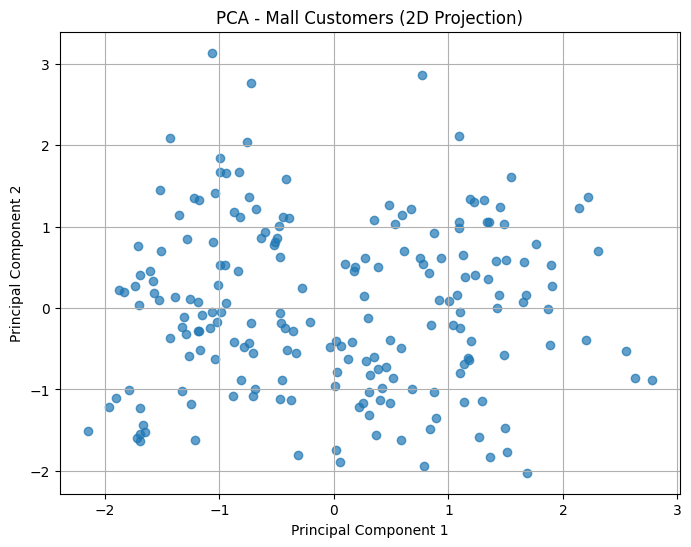

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7)
plt.title("PCA - Mall Customers (2D Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

In [ ]:
import scipy.cluster.hierarchy as sch

linked = sch.linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 5))
sch.dendrogram(linked)
plt.title("Dendrogram - Agglomerative Clustering")
plt.xlabel("Customer Index")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

PCA components retain the following proportion of the original information:

| Component | Variance Retained |
|-----------|-------------------|
| PC1       | 34%               |
| PC2       | 26%               |
| **Total** | **60%**           |

This means the 2D projection captures **60% of the total structure** in the original 4D dataset.


In [12]:
explained = pca.explained_variance_ratio_
print(f"PC1: {explained[0]:.2f}, PC2: {explained[1]:.2f}")


PC1: 0.34, PC2: 0.26


This notebook helps understand both hierarchical approaches and how to visualize and extract flat clusters from tree structures.